In [6]:
import experiment_inference_synthetic_networks
%matplotlib inline

# Comparison row normalization vs not

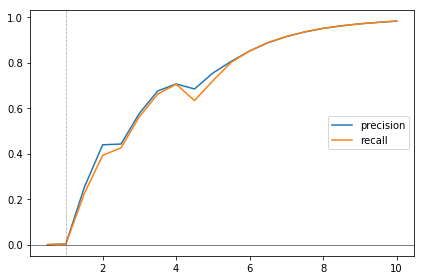

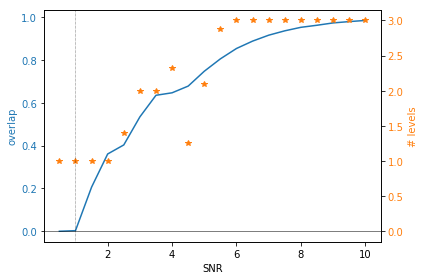

In [7]:
filename1 = "results_asym/results31OctRowNormalization/results31OctNew_complete_inf_3_3.txt"
experiment_inference_synthetic_networks.plot_complete(filename1)

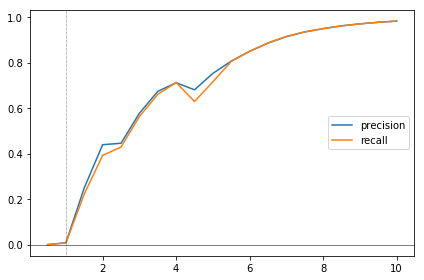

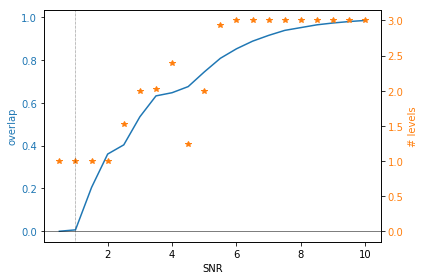

In [8]:
filename2 = "results_asym/resultsMay17/v0.2experiments_nmi_complete_inf_3_3.txt"
experiment_inference_synthetic_networks.plot_complete(filename2)

* Seems to make no difference here :(
* SNR 4.5 seems to be the magic number -- what happens there in terms of Omega? any non-identifiability by design of the prob matrix?

In [24]:
import GHRGbuild
import networkx as nx
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
n = 3**9
n_levels = 3
groups_per_level = 3
c_bar = 50
snr = 4.5

D_actual=GHRGbuild.createAsymGHRG(n,snr,c_bar,n_levels,groups_per_level)

Hierarchy Level:  0 | KS Detectable:  True | Link Probabilities in / out per block:  0.004064421074023269 0.00177818421988518
Hierarchy Level:  1 | KS Detectable:  True | Link Probabilities in / out per block:  0.007403683732186147 0.0023947897449418296
Hierarchy Level:  2 | KS Detectable:  True | Link Probabilities in / out per block:  0.015209813924391745 0.0035006186360833497


In [23]:
N, E = D_actual.construct_full_block_params()

139498.9545037744
174933.33333333334
174933.33333333334
38259378.0
43040160.0
43040160.0
[[  8072.   1860.   1860.  11454.  11454.  76545.  76545.]
 [  1860.   8072.   1860.  11454.  11454.  76545.  76545.]
 [  1860.   1860.   8072.  11454.  11454.  76545.  76545.]
 [ 11454.  11454.  11454.  35395.  11454.  76545.  76545.]
 [ 11454.  11454.  11454.  11454.  35395.  76545.  76545.]
 [ 76545.  76545.  76545.  76545.  76545. 174933.  76545.]
 [ 76545.  76545.  76545.  76545.  76545.  76545. 174933.]]


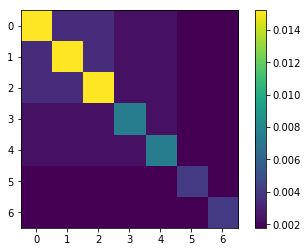

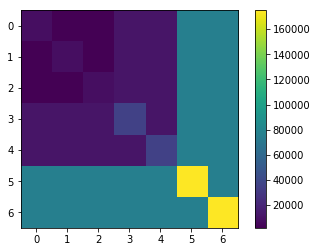

In [49]:
Omega = (E+E.T-np.diag(np.diag(E)))/(N+N.T-np.diag(np.diag(N)))
plt.imshow(Omega)
plt.colorbar()
plt.figure()
plt.imshow(E+E.T)
plt.colorbar()

TEST = E+E.T 
TEST2 = N+N.T

print TEST[0:4,0:4].sum()
print TEST[5,5]
print TEST[6,6]


print TEST2[0:4,0:4].sum()
print TEST2[5,5]
print TEST2[6,6]

print np.round(TEST)

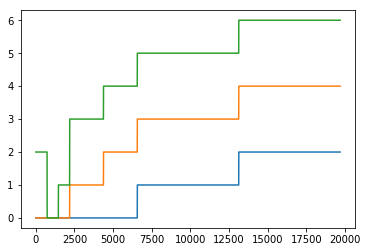

In [136]:
for part in D_actual.get_partition_all():
    plt.plot(part)

* What is this quirk in the partition about? should be uncritical, but still.. worth investigating?
* should the asymmetric structure of Omega be the other way around? We have a very high degree heterogeneity -- more difficult than neccesary?!

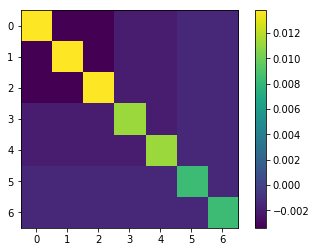

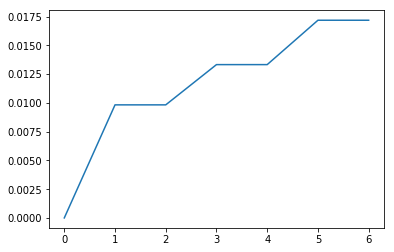

In [137]:
import scipy
L = scipy.diag(Omega.sum(axis=0))-Omega
L = (L + L.T)/2
eigvals, eigvec = scipy.linalg.eigh(L)
plt.imshow(L)
plt.colorbar()
plt.figure()
plt.plot(eigvals)

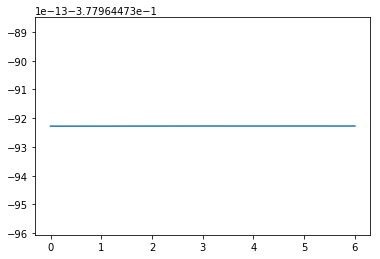

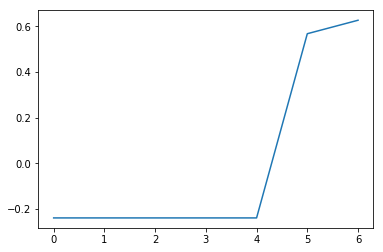

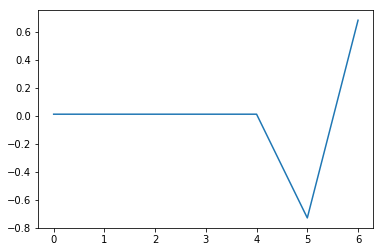

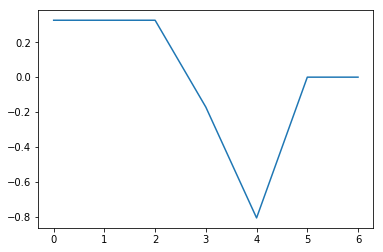

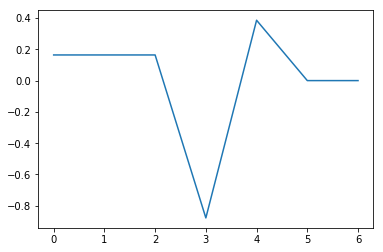

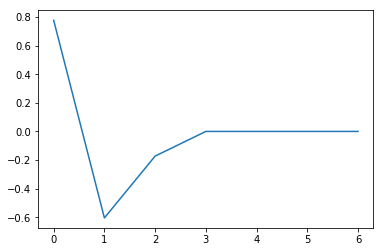

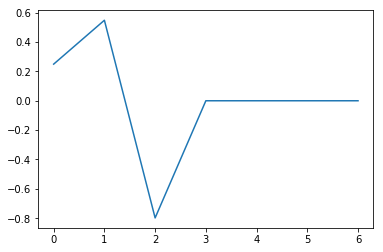

In [138]:
for vec in eigvec.T:
    plt.figure()
    plt.plot(vec)
    